# Import the libraries and dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
import statsmodels.api as sm
import missingno as msno
%matplotlib notebook
import pandas_profiling as pdp

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
data = pd.read_csv("wage2.csv", sep=" ", na_values=".")

# Check the data

In [ ]:
data.head(10)

In [ ]:
# # Show the profile report
# pdp.ProfileReport(data)

In [8]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 17 columns):
wage       935 non-null int64
hours      935 non-null int64
IQ         935 non-null int64
KWW        935 non-null int64
educ       935 non-null int64
exper      935 non-null int64
tenure     935 non-null int64
age        935 non-null int64
married    935 non-null int64
black      935 non-null int64
south      935 non-null int64
urban      935 non-null int64
sibs       935 non-null int64
brthord    852 non-null float64
meduc      857 non-null float64
feduc      741 non-null float64
lwage      935 non-null float64
dtypes: float64(4), int64(13)
memory usage: 124.3 KB


In [6]:
# # change . to null
# data
# data['brthord'] = data['brthord'].replace({".": np.nan})
# data['meduc'] = data['meduc'].replace({".": np.nan})
# data['feduc'] = data['feduc'].replace({".": np.nan})

In [7]:
# data["brthord"] = data["brthord"].astype(float)
# data["meduc"] = data["meduc"].astype(float)
# data["feduc"] = data["feduc"].astype(float)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001272BA5D4A8>,
      dtype=object)

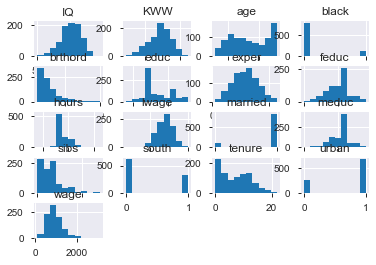

In [9]:
# Dataのデータフレームのヒストグラムを作成
data.hist()

In [10]:
data = data.dropna()

# Simple Linear Regression

In [15]:
# Choose the variables
y = data["lwage"]
x2 = data.drop(["lwage","wage"], axis=1)

In [16]:
# Run the regression
x = sm.add_constant(x2)
results = sm.OLS(y,x).fit()

C:\Users\Yuzi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [17]:
# Show the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     17.84
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           1.01e-39
Time:                        16:32:12   Log-Likelihood:                -237.96
No. Observations:                 663   AIC:                             507.9
Df Residuals:                     647   BIC:                             579.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1564      0.225     22.888      0.000       4.714       5.599
hours         -0.0065      0.002     -3.385      0.001      -0.010      -0.003
IQ             0.0032      0.001      2.604      0.009       0.001       0.006
KWW            0.0037      0.002      1.562      0.119      -0.001       0.008
educ           0.0413      0.009      4.615      0.000       0.024       0.059
exper          0.0107      0.004      2.424      0.016       0.002       0.019
tenure         0.0071      0.003      2.454      0.014       0.001       0.013
age            0.0091      0.006      1.524      0.128      -0.003       0.021
married        0.2008      0.046      4.365      0.000       0.110       0.291
black         -0.1051      0.056     -1.889      0.059      -0.214       0.004
south         -0.0491      0.031     -1.596      0.111      -0.109       0.011
urban          0.1957      0.031      6.263      0.000       0.134       0.257
sibs           0.0096      0.008      1.221      0.222      -0.006       0.025
brthord       -0.0185      0.012     -1.596      0.111      -0.041       0.004
meduc          0.0096      0.006      1.562      0.119      -0.002       0.022
feduc          0.0056      0.005      1.036      0.301      -0.005       0.016
==============================================================================
Omnibus:                       44.056   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.252
Skew:                          -0.206   Prob(JB):                     6.42e-33
Kurtosis:                       5.280   Cond. No.                     2.07e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""